# Credit Card Fraud Detection Notebook
This is your complete pipeline: preprocessing, anomaly detection, XGBoost training, ROC, Confusion Matrix.

[[142   8]
 [ 14 132]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       150
           1       0.94      0.90      0.92       146

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



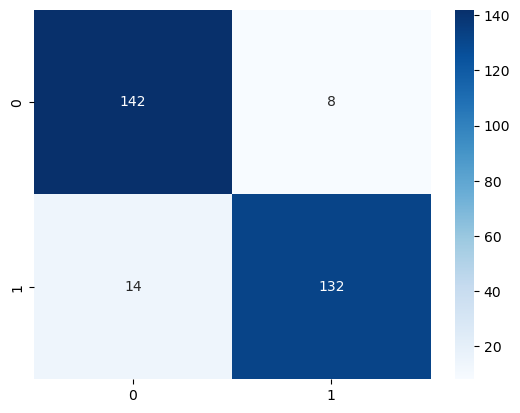

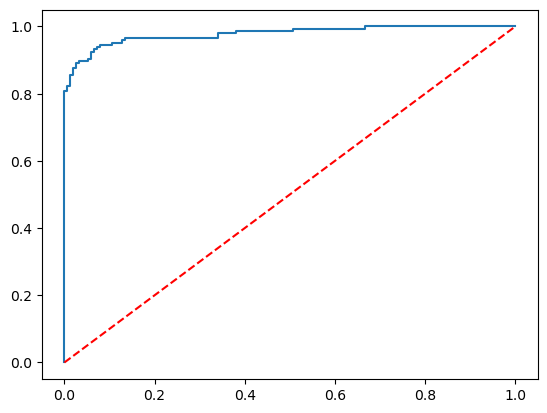

['model.pkl']

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
import joblib

df = pd.read_csv('creditcard copy.csv')
if 'Amount' in df.columns:
	df['NormalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
	df.drop(['Time','Amount'], axis=1, inplace=True)
else:
	print("Column 'Amount' not found in the DataFrame. Skipping normalization.")

X = df.drop('Class', axis=1)
y = df['Class']
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
y_pred_iso = iso_forest.fit_predict(X)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.show()

joblib.dump(model, 'model.pkl')